# Pymaceuticals Inc.
---

### Analysis

- Based on the bar graph, Capomulin and Ramicane had the highest mice numbers while Propriva had the least.
- The study used almost 51% male and 49% female mice as samples for the drug test.
- Capomulin and Ramicane were the most successful drugs in reducing tumor volume in mice. For example, the line graph shows for mouse l509 Capomulin reduced the tumor volume in less than 40 days.
- Based on the box plot for the four drug regimens, only Infubinol had an outlier. 
- There is a positive correlation of 84% between mouse weight and average tumor volume. As the mouse weight increases, the tumor volume also increases.
 

In [68]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
mice_data= pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mice_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [8]:
# Checking the number of mice.
len(mice_data["Mouse ID"].unique())

249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = mice_data.loc[mice_data.duplicated(subset = ['Mouse ID','Timepoint'], keep = False), 'Mouse ID']

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ID = duplicate_mice.unique()
duplicate_ID

array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicates = mice_data.loc[mice_data ["Mouse ID"] == "g989"]
all_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mice_data[mice_data['Mouse ID'].isin(duplicate_ID) == False]
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice_df["Mouse ID"].unique())

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_df_mean = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_df_median = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_df_var = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_df_std = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_df_sem = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_df = pd.DataFrame ({ "Mean Tumor Volume" : drug_df_mean,
                             "Median Tumor Volume" : drug_df_median,
                             "Tumor Volume Variance" : drug_df_var,
                             "Tumor Volume Std. Dev." : drug_df_std,
                             "Tumor Volume Std. Err." : drug_df_sem })

regimen_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

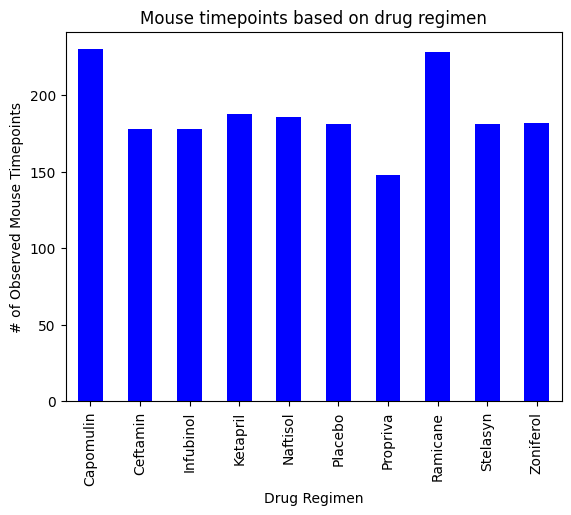

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_bar = clean_mice_df.groupby("Drug Regimen")["Timepoint"].count()

bar_chart= mouse_bar.plot ( kind = 'bar', color = 'blue', title ="Mouse timepoints based on drug regimen")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

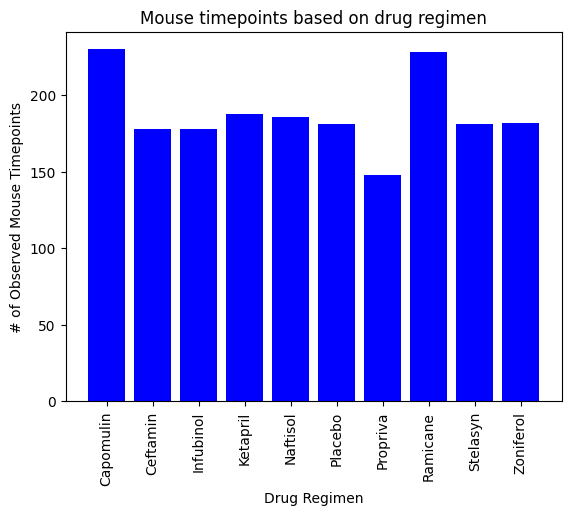

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mouse_bar.index, mouse_bar, color = 'blue')
plt.title("Mouse timepoints based on drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks (rotation= 90)
plt.show()



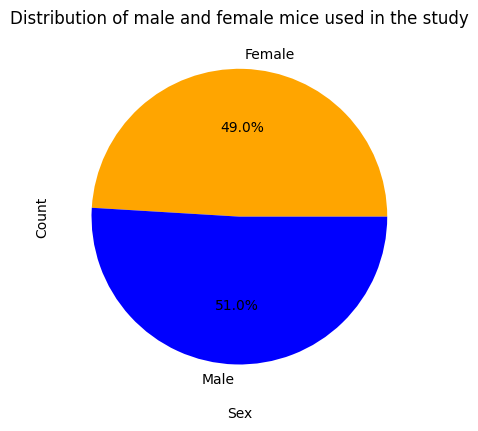

In [28]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_pie = clean_mice_df.groupby("Sex")["Mouse ID"].count()

colors = ['orange', 'blue']
# Make the pie chart
pie_chart= mouse_pie.plot ( kind = 'pie', colors= colors, autopct='%1.1f%%', title ="Distribution of male and female mice used in the study")
pie_chart.set_xlabel("Sex")
pie_chart.set_ylabel("Count")
plt.show()

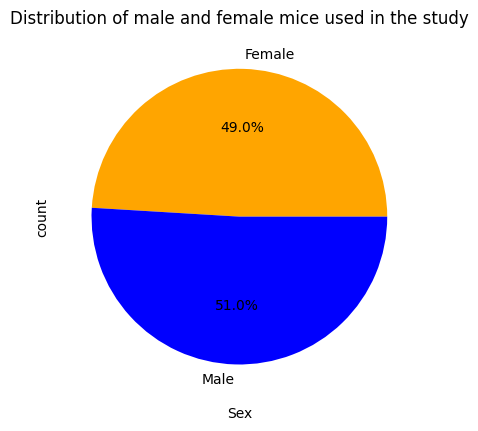

In [30]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
mouse_pie = clean_mice_df.groupby("Sex")["Mouse ID"].count()

colors = ['orange', 'blue']
# Get the unique mice with their gender
plt.pie(mouse_pie, labels= mouse_pie.index, colors=colors,
        autopct="%1.1f%%")
plt.title("Distribution of male and female mice used in the study")
plt.xlabel("Sex")
plt.ylabel("count")
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time = clean_mice_df.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df= clean_mice_df.merge(greatest_time, on= ['Mouse ID', 'Timepoint'])
tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in regimen_list:
    regimen_df = tumor_df.loc[(tumor_df["Drug Regimen"] == regimen)]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol.append(regimen_df["Tumor Volume (mm3)"])

    # Determine outliers using upper and lower bounds
    quartiles= regimen_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lower_q = quartiles [0.25]
    upper_q = quartiles [0.75]
    IQR = upper_q - lower_q

    lower_bound = lower_q - (1.5*IQR)
    upper_bound = upper_q + (1.5*IQR)
    outliers = regimen_df.loc[(regimen_df["Tumor Volume (mm3)"] < lower_bound) | (regimen_df["Tumor Volume (mm3)"] > upper_bound)]
    outliers_df = outliers['Tumor Volume (mm3)']

    print(f'{regimen} potential outliers: {outliers_df}.')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).


C:\Users\henay\AppData\Local\Temp\ipykernel_10992\703002678.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(tumor_vol, labels = regimen_list , flierprops= marker_spec)


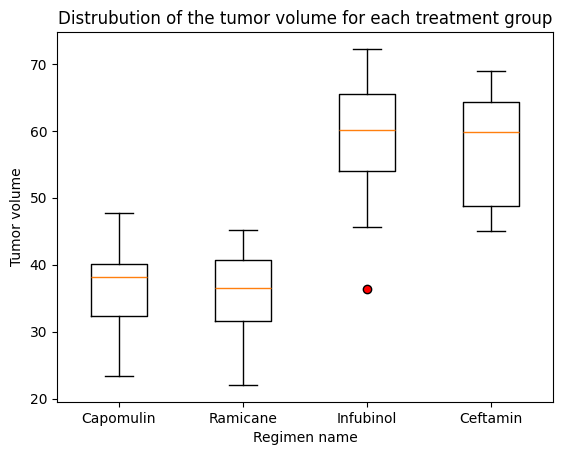

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Specify display details for the outliers
marker_spec = {'marker': 'o', 'markerfacecolor': 'red'}

# Create chart and add title and labels
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol, labels = regimen_list , flierprops= marker_spec)
plt.title ("Distrubution of the tumor volume for each treatment group")
plt.xlabel ("Regimen name")
plt.ylabel ("Tumor volume")
plt.show()

## Line and Scatter Plots

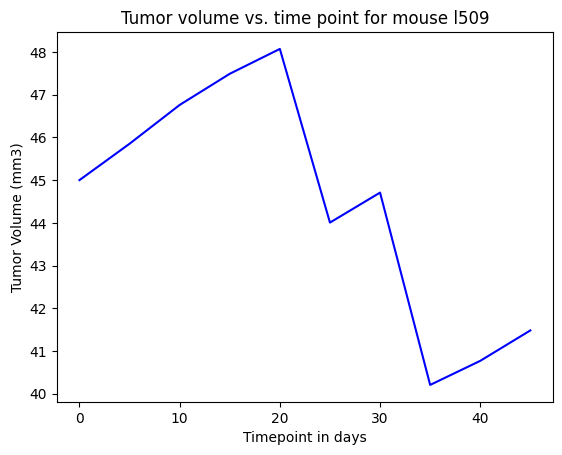

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = clean_mice_df[clean_mice_df["Drug Regimen"]== "Capomulin"]

single_mouse_df = capomulin_df[capomulin_df["Mouse ID"] == "l509"]

timepoint = single_mouse_df["Timepoint"]
tumor = single_mouse_df["Tumor Volume (mm3)"]

plt.plot(timepoint, tumor, linestyle='-', color='blue')
plt.xlabel("Timepoint in days")
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Tumor volume vs. time point for mouse l509")
plt.show()

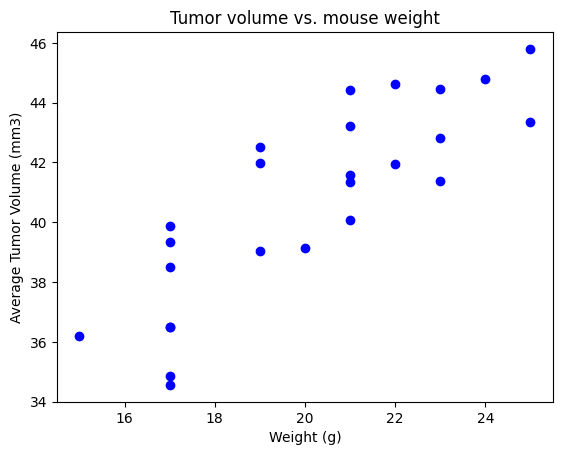

In [58]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_mice_df[clean_mice_df["Drug Regimen"]== "Capomulin"]

avg_tumor = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight= capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(mouse_weight, avg_tumor, color='blue')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title ("Tumor volume vs. mouse weight")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


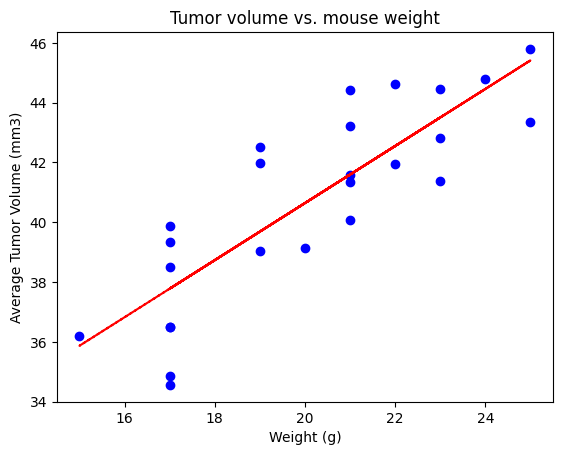

In [74]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_tumor = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight= capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

correlation = st.pearsonr(avg_tumor,mouse_weight)[0]
print(f'The correlation between mouse weight and the average tumor volume is {correlation: .2f}')

# Perform a linear regression 
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(mouse_weight, avg_tumor)

# Create equation of line 
pe_fit = pe_slope * mouse_weight + pe_int

#graph
plt.scatter(mouse_weight, avg_tumor, color='blue')
plt.plot(mouse_weight,pe_fit,"--", color= "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title ("Tumor volume vs. mouse weight")
plt.show()
